# **Semesterabschließende schriftliche Ausarbeitung**  
**Fachhochschule Südwestfalen**

---

**Modul:** Deep Learning  
**Semester:** Wintersemester 2025/2026  
**Thema:** *Deep-Learning-basierte Inspektion von Tethered Caps: Modellvergleich, Threshold-Optimierung und industrielle Zero-Defect-Anforderungen*

---

### **Autoren**
**Sarah Gemünden** — Matrikelnummer: 30482243  
**Chanyut Bonkhamsaen** — Matrikelnummer: [Nummer einfügen]

---

**Abgabe am:** XX. Februar 2026  

---

# Gliederung

**1. Einleitung**  
**2. Theoretische Grundlagen**  
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Sicherungsringinspektion in Getränkeabfüllanlagen  
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Anforderungen und Herausforderungen der Tethterd-Caps-Inspektion    
&nbsp;&nbsp;&nbsp;&nbsp;2.3   
&nbsp;&nbsp;&nbsp;&nbsp;2.4  

**3. Datenimport und Datenvorbereitung**  
&nbsp;&nbsp;&nbsp;&nbsp;3.1 Pakete importieren  
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Datenimport und erste explorative Datenanalyse  

# 1. Einleitung

* Hintergrund: Abfüllanlagen in der Getränkeindustrie
* div. Inspektionstechnik in einer Abfüllanlage
* Qualitätskontrolle im Verschließprozess
* Sicherungsringinspektion
* Herausforderung durch Tethtered Caps
* Motivation für den Einsatz von Deep Learning
* Zielsetzung der Arbeit

# 2. Theoretische Grundlagen

## 2.1 Sicherungsringinspektion in Getränkeabfüllanlagen

In Getränkeabfüllanlagen ist eine sichere und dichte Verschließung der Behälter entscheidend für Produktqualität, Haltbarkeit und Geschmack. Ein beschädigter oder unvollständiger Sicherungsring kann zu Undichtigkeiten führen und damit die Produktsicherheit beeinträchtigen. Die folgende schematische Darstellung zeigt den Bereich des Sicherungsrings in Rot:

<p align="center">
  <img src="Bilder/Sicherungsring.png" width="150">
</p>

Zur automatisierten Überprüfung des Sicherungsrings wird bei der KHS GmbH das System Innocheck TSI (Tamper-evident Seal Inspection) eingesetzt. Das System inspiziert den Sicherungsring eines Verschlusses auf Unversehrtheit, indem es den gesamten Ring aus unterschiedlichen Blickwinkeln erfasst und auswertet. Die folgende Abbildung verdeutlicht das Prinzip der optischen Erfassung und der 360-Grad-Rundumsicht:

<p align="center">
  <img src="Bilder/TSI.png" width="400">
</p>

Zwei Kameras erzeugen mithilfe einer Spiegeloptik eine 360°-Rundumsicht, während LED-Beleuchtung für gleichmäßige und reproduzierbare Lichtverhältnisse sorgt. Auf Basis moderner Bildverarbeitungsalgorithmen wertet die Software die Farbpixel und Strukturen des Sicherungsrings aus und erkennt dabei auch kleinste Beschädigungen. Da die Deckelgeometrie aus allen Richtungen gleich aussieht, ist eine zuverlässige Bewertung allein anhand der Farbpixel möglich.

Durch dieses Verfahren ermöglicht das System:
- eine zuverlässige Kontrolle der Ringintegrität
- die Erkennung kleinster Defekte
- eine vollständige Rundumsicht des Verschlusses [1]

Seit Juli 2024 gilt in der EU die Vorgabe, dass Einweg-Getränkeverpackungen bis zu drei Litern mit sogenannten Tethered Caps ausgestattet sein müssen. Dabei handelt es sich um Verschlusskappen, die auch nach dem Öffnen dauerhaft mit der Flasche verbunden bleiben, um zu verhindern, dass lose Deckel in die Umwelt gelangen. [2]

Durch die Einführung der Tethered Caps erhöhte sich die Vielfalt an Verschlussvarianten deutlich. Die neue, bewegliche Geometrie der Verschlüsse führt dazu, dass diese nicht mehr aus allen Richtungen gleich aussehen. Daher ist eine reine Inspektion anhand der Farbpixel, wie sie bei klassischen symmetrischen Schraubverschlüssen eingesetzt wurde, für diesen Anwendungsfall nicht mehr ausreichend.

Um weiterhin eine zuverlässige Qualitätskontrolle sicherzustellen, hat die KHS GmbH die bestehende Verschlusskontrolle Innocheck TSI um KI-basierte Verfahren erweitert. Kameras erfassen die Verschlüsse in hoher Auflösung, während die Modelle die aufgenommenen Bilder in Echtzeit auswerten. Durch den Einsatz von Deep Learning können sich die Systeme an neue Fehlerbilder anpassen und auch komplexe oder seltene Defekte zuverlässig erkennen. [3]

noch mehr das Ziel beschreiben - Klassifizierer; in Echtzeit - also Geschwindigkeit ist ein Thema; welche Metriken sind wichtig; und eben gut-schlecht klassifizierer - damit schlecht-flaschen ausgeschleust werden

## 2.2 Anforderungen und Herausforderungen der Tethterd-Caps-Inspektion

* Typische Fehlerbilder (Smile, Risse, fehlende / gebrochene Stege, Deformationen)
* hohe Flaschenleistung --> Echtzeitverarbeitung
* wachelnde Flaschen auf dem Transportband
* Tropfen, Kondensatz
* variable Beleuchtung
* Deckelvarianten & Farbvielfalt
* komplexe Geometrie --> Pixelverfahren schwierig

# 3. Datenimport und Datenvorbereitung

## 3.1 Pakete importieren

In [66]:
# Standardbibliotheken
import os                          # Arbeiten mit Dateipfaden und Ordnerstrukturen
from collections import Counter    # Zählen von Elementen (z. B. Klassenhäufigkeiten)

# Numerische Berechnungen
import numpy as np                 # Numerische Operationen (Arrays, Statistiken, Vektorisierung)

# Bildverarbeitung und Visualisierung
from PIL import Image              # Öffnen und Verarbeiten von Bilddateien
import matplotlib.pyplot as plt    # Darstellung von Bildern, Plots und Diagrammen

# Mathematische Funktionen
from math import floor

## 3.2 Datenimport und erste explorative Datenanalyse

Die Bilddaten wurden uns von der Inspektionstechnik der KHS GmbH für Forschungszwecke zur Verfügung gestellt. Die Aufnahmen stammen aus realen Prüfprozessen und wurden nicht im Rahmen dieser Arbeit selbst erzeugt.

Der Datensatz ist in mehreren Ebenen strukturiert. Auf der obersten Ebene befinden sich Ordner, die unterschiedliche Verschlussvarianten repräsentieren, beispielsweise aquapanna_grey, cc_red, fanta_orange oder sprite_green. Jeder dieser Ordner enthält zwei weitere Unterordner, welche die Klassenzuordnung der Bilder abbilden: good und bad.

Innerhalb dieser Ordner liegen die eigentlichen Bilddateien. Für jedes untersuchte Exemplar existieren vier Aufnahmen, die aus verschiedenen Kameraperspektiven erzeugt wurden. Die Dateinamen Cam1Side_xxxxxxxxxx, Cam1Top_xxxxxxxxxx, Cam2Side_xxxxxxxxxx und Cam2Top_xxxxxxxxxx kennzeichnen jeweils Kamera, Perspektive und eine zehnstellige fortlaufende Nummer. Durch die Kombination dieser vier Perspektiven wird gewährleistet, dass der Verschluss aus allen relevanten Blickwinkeln erfasst wird und damit eine vollständige 360-Grad-Betrachtung möglich ist.

Da es sich um reale Produktionsdaten handelt, kann es vorkommen, dass für dieselbe Flasche nicht alle vier Bilder in derselben Klasse liegen. So kann beispielsweise eine Perspektive einen Fehler zeigen und deshalb als bad vorliegen, während die übrigen Perspektiven derselben Flasche als good klassifiziert sind. In der realen Produktionslinie führt bereits ein einzelnes fehlerhaftes Bild dazu, dass die entsprechende Flasche ausgeschleust wird. Für das Training und die Auswertung der Deep-Learning-Modelle werden die Bilder in der vorliegenden Struktur verwendet.

In [7]:
# Pfad zum Ordner, in dem die bereitgestelltn Bilddaten abgelegt wurden
pfad = r"Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures"

In der klassischen Bildklassifikation liegt ein Datensatz üblicherweise in einer einfachen Ordnerstruktur vor, bei der ein Hauptordner jeweils einen Unterordner pro Klasse enthält (z. B. good und bad). In diesem Anwendungsfall ist die Struktur komplexer, da die Bilder zunächst nach Verschlussvarianten organisiert sind und erst innerhalb dieser Ordner eine Unterteilung in good und bad erfolgt. Um die Daten dennoch flexibel verarbeiten und bei Bedarf problemlos weitere Varianten ergänzen zu können, werden im folgenden Schritt alle Bildpfade rekursiv durchsucht und in einer Liste gespeichert. Gleichzeitig wird die Anzahl der Bilder pro Klasse ermittelt, um einen ersten Überblick über die Klassenverteilung zu erhalten.

In [20]:
# Counter-Objekt erzeugen
# speichert, wie viele Bilder es insgesamt in den Klassen "good" & "bad" gibt
class_count = Counter()
# Dictionary, dass für jede Verschlussart die Anzahl der good- und bad-Beispiele speichert
variant_stats = {}
# speichert eine Liste mit allen vollständigen Dateipfaden
all_image_paths = []                 

# os.walk(pfad) --> läuft rekursiv durch alle Unterordner unterhalb von pfad
# root --> aktueller Ordnerpfad
# dirs --> Unterordner in diesem Ordner
# files --> Dateien in diesem Ordner
for root, dirs, files in os.walk(pfad):
    folder = os.path.basename(root).lower() #folder --> Ordnername ohne kompletten Pfad

    # Wir suchen Ordner "good" oder "bad"
    if folder in ["good", "bad"]:
        label = folder

        # Verschlussart (-->variant) ist der übergeordnete Ordnername
        variant = os.path.basename(os.path.dirname(root)).lower()

        # Falls Verschlussart noch nicht im Dictionary ist → initialisieren
        if variant not in variant_stats:
            variant_stats[variant] = {"good": 0, "bad": 0}

        # Alle Bilddateien im Ordner durchgehen
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):

                # Gesamtstatistik berechnen
                class_count[label] += 1

                # Statistik für diese Verschlussart berechnen
                variant_stats[variant][label] += 1

                # vollständigen Pfad speichern
                full_path = os.path.join(root, f)
                all_image_paths.append(full_path)

In [27]:
# Ausgabe der Gesamtstatistik
print("Klassenverteilung (gesamt):\n")
print(class_count)
print(f"Gesamtanzahl Bilder: {len(all_image_paths)}\n")

# Anzahl der Verschlussvarianten ausgeben
num_variants = len(variant_stats)
print(f"Anzahl Verschlussvarianten: {num_variants}\n")

# Ausgabe Statistik je Verschlussart
print("Verteilung je Verschlussvariante:\n")
for variant, stats in sorted(variant_stats.items()):
    total = stats["good"] + stats["bad"]
    bad_rate = (stats["bad"] / total) * 100 if total > 0 else 0
    print(
        f"{variant:20s}  "
        f"good: {stats['good']:5d}   "
        f"bad: {stats['bad']:5d}   "
        f"gesamt: {total:5d}   "
        f"bad-Rate: {bad_rate:5.2f}%"
    )

Klassenverteilung (gesamt):

Counter({'good': 17188, 'bad': 14991})
Gesamtanzahl Bilder: 32179

Anzahl Verschlussvarianten: 18

Verteilung je Verschlussvariante:

aquapanna_grey        good:   536   bad:   524   gesamt:  1060   bad-Rate: 49.43%
cc_lightgray          good:   535   bad:   942   gesamt:  1477   bad-Rate: 63.78%
cc_red                good:  2097   bad:  1014   gesamt:  3111   bad-Rate: 32.59%
fanta_blue            good:   618   bad:   603   gesamt:  1221   bad-Rate: 49.39%
fanta_orange          good:  1186   bad:   578   gesamt:  1764   bad-Rate: 32.77%
flirt_orange          good:   564   bad:  1479   gesamt:  2043   bad-Rate: 72.39%
flirt_zitrone         good:   851   bad:   943   gesamt:  1794   bad-Rate: 52.56%
gg_darkblue           good:  2559   bad:  1043   gesamt:  3602   bad-Rate: 28.96%
gg_lightblue          good:  1046   bad:  1070   gesamt:  2116   bad-Rate: 50.57%
kcl_blue              good:   580   bad:   316   gesamt:   896   bad-Rate: 35.27%
kcl_orange       

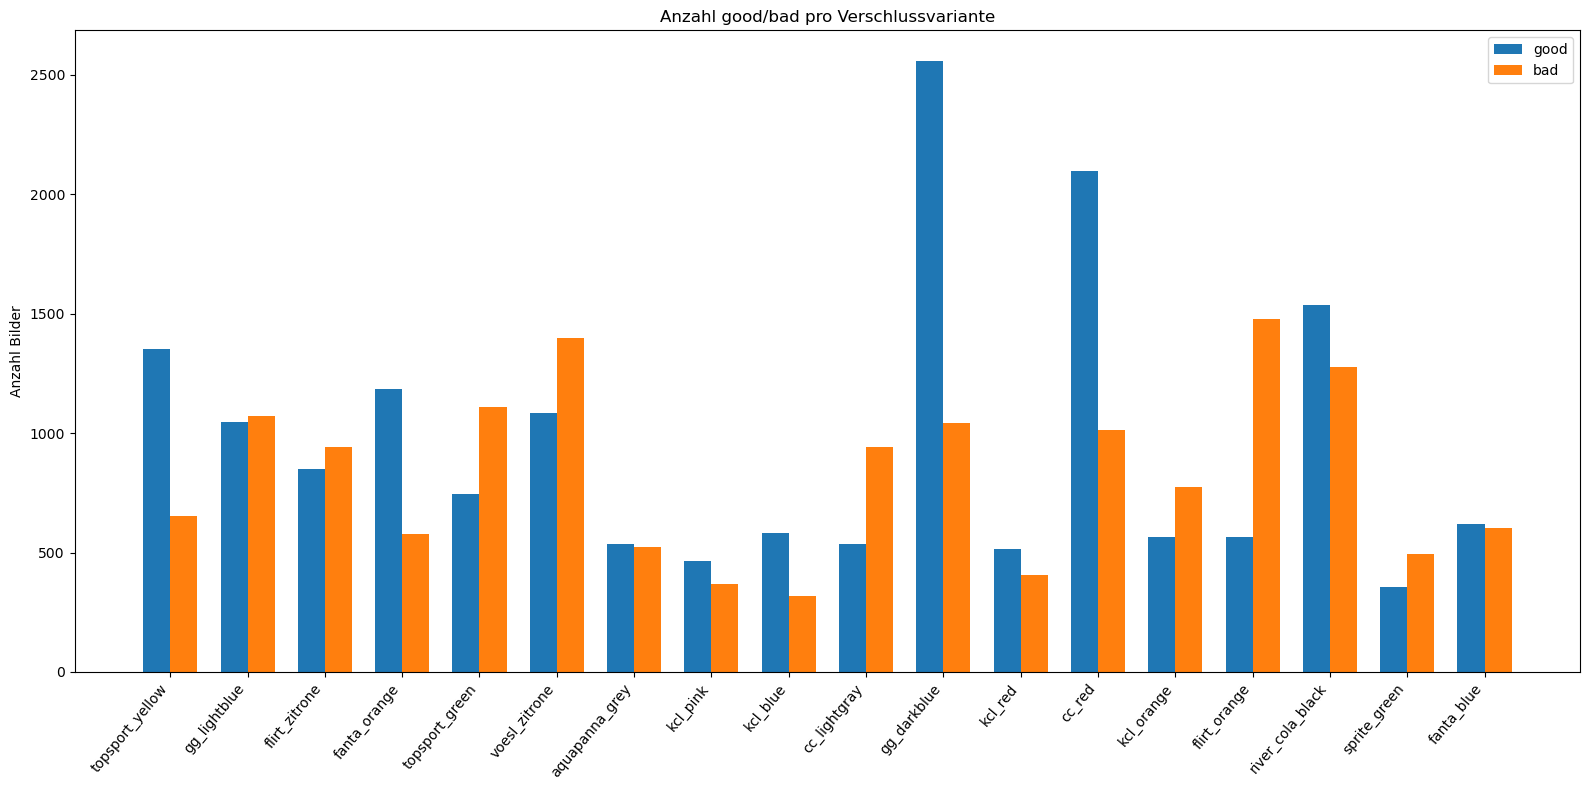

In [34]:
# Daten vorbereiten
variants = list(variant_stats.keys())
good_counts = [variant_stats[v]["good"] for v in variants]
bad_counts  = [variant_stats[v]["bad"] for v in variants]

x = np.arange(len(variants))
width = 0.35

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, good_counts, width, label="good")
plt.bar(x + width/2, bad_counts,  width, label="bad")
plt.xticks(x, variants, rotation=50, ha="right")
plt.ylabel("Anzahl Bilder")
plt.title("Anzahl good/bad pro Verschlussvariante")
plt.legend()
plt.tight_layout()
plt.show()

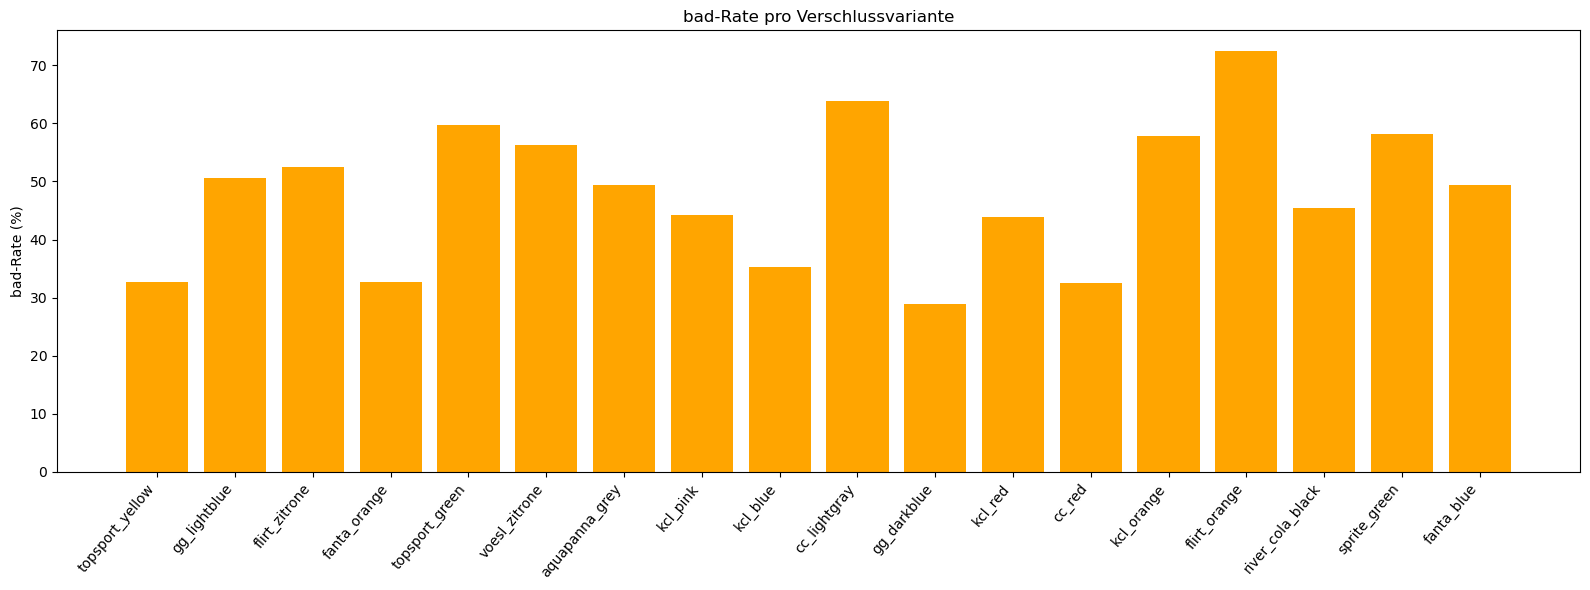

In [37]:
# bad-Rate berechnen
bad_rates = [
    (variant_stats[v]["bad"] / (variant_stats[v]["good"] + variant_stats[v]["bad"])) * 100
    for v in variants
]

plt.figure(figsize=(16, 6))
plt.bar(variants, bad_rates, color="orange")

plt.xticks(rotation=50, ha="right")
plt.ylabel("bad-Rate (%)")
plt.title("bad-Rate pro Verschlussvariante")
plt.tight_layout()
plt.show()

Die Bilddateien wurden rekursiv eingelesen und die vollständigen Dateipfade in einer Liste (all_image_paths) gespeichert. Dies ermöglicht eine flexible Weiterverarbeitung der Daten, da die Bildpfade später direkt für das Erstellen eigener Dataset-Klassen, für den Train-/Validierungs-Split sowie für Visualisierungen und Qualitätsanalysen genutzt werden können.

Zusätzlich wurde ein erster quantitativer Überblick über den Datensatz erstellt. Insgesamt liegen 32 179 Bilder vor, davon 17 188 „good“ und 14 991 „bad“. Damit ist die Gesamtverteilung der Klassen relativ ausgewogen, auch wenn die Anzahl der good-Bilder leicht überwiegt.

Darüber hinaus wurde die Verteilung je Verschlussvariante analysiert, um Unterschiede in der Datenmenge und im Verhältnis von fehlerhaften zu fehlerfreien Beispielen sichtbar zu machen. Die Auswertung zeigt, dass die Anzahl der Bilder pro Verschlussvariante teils stark variiert: die geringste Gesamtanzahl weist kcl_pink mit 832 Bildern auf, während gg_darkblue mit 3602 Bildern die am häufigsten vertretene Variante ist. Ebenso unterscheiden sich die bad-Raten je Variante erheblich. Einige Varianten weisen eine sehr hohe Fehlerrate auf, beispielsweise flirt_orange mit 72.39 % oder cc_lightgray mit 63.78 %. Andere Varianten zeigen vergleichsweise niedrige Fehlerraten, etwa gg_darkblue mit 28.96 %, cc_red mit 32.59 % oder fanta_orange mit 32.77 %.

Diese Unterschiede sind für die spätere Modellbewertung bedeutsam, da ungleich verteilte Varianten und stark variierende bad-Raten das Lernverhalten der Modelle maßgeblich beeinflussen können. Varianten mit wenigen Beispielen oder hoher Fehlerrate können insbesondere zu verzerrten Ergebnissen oder abweichender Modellperformance führen.

Um die Bilder für die weitere Verarbeitung und das spätere Training der Deep-Learning-Modelle vorzubereiten, ist es zunächst notwendig zu prüfen, ob die gelieferten Aufnahmen einheitliche oder unterschiedlich große Bildformate aufweisen. Abweichende Auflösungen können sich auf das Preprocessing auswirken und müssen gegebenenfalls durch ein einheitliches Resize-Verfahren harmonisiert werden. Daher wird im nächsten Schritt die Verteilung der Bildgrößen analysiert.

In [41]:
sizes = []

for img_path in all_image_paths:
    try:
        with Image.open(img_path) as img:
            sizes.append(img.size)   # (Breite, Höhe)
    except:
        pass

print(f"Anzahl analysierter Bilder: {len(sizes)}")

# Häufigste Auflösungen anzeigen
from collections import Counter
size_count = Counter(sizes)

print("\nvorhandene Bildgrößen:")
for s, c in size_count:
    print(f"{s} → {c} Bilder")

Anzahl analysierter Bilder: 32179

vorhandene Bildgrößen:
346 → 108 Bilder
334 → 112 Bilder
344 → 113 Bilder
358 → 113 Bilder
346 → 113 Bilder
366 → 118 Bilder
338 → 117 Bilder
358 → 122 Bilder
356 → 131 Bilder
350 → 119 Bilder
366 → 109 Bilder
364 → 125 Bilder
366 → 116 Bilder
358 → 127 Bilder
346 → 117 Bilder
348 → 122 Bilder
354 → 121 Bilder


Die Analyse der Bildauflösungen zeigt, dass der Datensatz aus insgesamt 32 179 Bildern besteht, die in 17 unterschiedlichen Größen vorliegen. Die Breite der Bilder variiert dabei zwischen ca. 334 und 366 Pixeln, während die Höhe zwischen 108 und 131 Pixeln liegt. Obwohl die Auflösungen leicht voneinander abweichen, bewegen sie sich in einem relativ engen Größenbereich.

Für die weitere Modellierung bedeutet dies, dass ein einheitliches Resize-Verfahren erforderlich ist, um alle Bilder auf dieselbe Eingabegröße zu bringen. Die geringe Varianz der Originalgrößen erleichtert diesen Schritt, da dabei nur minimale Verzerrungen oder Informationsverluste zu erwarten sind.

Um einen ersten visuellen Eindruck vom Datensatz zu gewinnen, werden im Folgenden repräsentative Beispielbilder dargestellt.
Zunächst werden zufällig ausgewählte good-Bilder gezeigt. Die Auswahl ist gleichmäßig über alle Verschlussvarianten verteilt, wodurch sich ein abwechslungsreicher Überblick ergibt. Dadurch wird sichtbar, wie unterschiedlich die Deckel hinsichtlich Farbe, Beleuchtung und Oberflächenstruktur aussehen können.

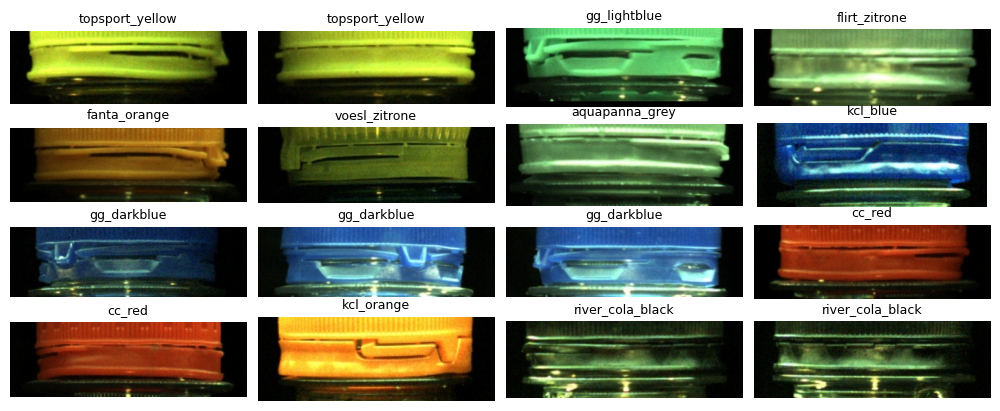

In [64]:
# --- Auswahl der 16 gleichmäßig verteilten good-Bilder ---
good_paths = [p for p in all_image_paths if "/good/" in p.lower()]
n = 16
step = len(good_paths) / n
idx = [floor(i * step) for i in range(n)]
selected_paths = [good_paths[i] for i in idx]

# --- Kompaktes Plot-Layout ---
fig, axs = plt.subplots(4, 4, figsize=(10, 4))  # kleineres Grid

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    # Titel: Verschlussname (kleiner)
    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")  # Achsen komplett off

# Abstände reduzieren
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.15
)

plt.show()

Neben den fehlerfreien Beispielen ist auch ein Blick auf die bad-Bilder wichtig, da diese die relevanten Defektarten enthalten, die ein Modell später erkennen soll.
Daher folgt im nächsten Schritt eine Auswahl typischer bad-Beispiele – ebenfalls gleichmäßig über alle Verschlussvarianten verteilt.

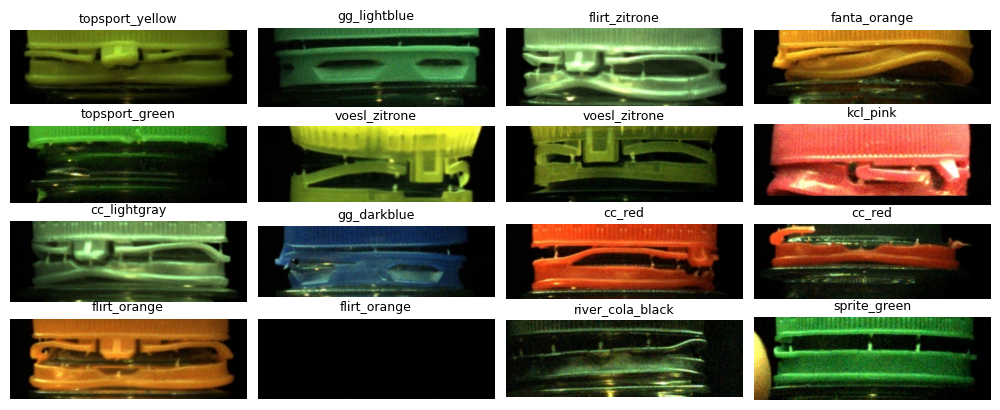

In [65]:
# --- Auswahl der 16 gleichmäßig verteilten good-Bilder ---
good_paths = [p for p in all_image_paths if "/bad/" in p.lower()]
n = 16
step = len(good_paths) / n
idx = [floor(i * step) for i in range(n)]
selected_paths = [good_paths[i] for i in idx]

# --- Kompaktes Plot-Layout ---
fig, axs = plt.subplots(4, 4, figsize=(10, 4))  # kleineres Grid

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    # Titel: Verschlussname (kleiner)
    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")  # Achsen komplett off

# Abstände reduzieren
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.15
)
plt.show()

Die Bildbeispiele verdeutlichen sowohl die große Farb- und Variantenvielfalt der Verschlüsse als auch die Variabilität innerhalb der Kameraaufnahmen (z. B. Helligkeit, Kontrast, Position des Deckels).
Die good-Bilder zeigen zudem, dass selbst fehlerfreie Tethered-Caps-Verschlüsse eine deutlich komplexere Geometrie aufweisen als herkömmliche Schraubverschlüsse. Während klassische Deckel aus allen Blickrichtungen nahezu identisch aussehen und sich daher gut über reine Pixelbasismethoden prüfen ließen, besitzen Tethered Caps bewegliche Stege und asymmetrische Formen. Dadurch entsteht eine natürliche strukturelle Variabilität, die für die Inspektion eine zusätzliche Herausforderung darstellt.

Die bad-Bilder zeigen typische Defekte wie Risse, gebrochene Stege, Verbiegungen („Smile“) oder geometrische Deformationen. Diese visuelle Heterogenität bestätigt, dass für die spätere Klassifikation ein robustes Modell erforderlich ist, das sowohl unterschiedliche Verschlussvarianten als auch die variierenden Aufnahmebedingungen zuverlässig bewältigen kann.

## 3.3 Bildvorverarbeitung

* Resize
* Normalisierung
* Augmentation

## 3.4 Train/Val/Test-Split

## 3.5 Custom Dataset & DataLoader

# X. Zusammenfassung und Ausblick

* Ausblick: Training auf neue Flaschen / Verschlüsse

# X. Quellenverzeichnis

[1] KHS GmbH, „Innocheck TSI – Sicherungsringinspektion“, interne Präsentation, Dortmund, 2025.  
[2] Verbraucherzentrale, „Tethered Caps: Warum geht der Verschluss an der Flasche nicht mehr ab?“, Online-Artikel, verfügbar unter: https://www.verbraucherzentrale.de/wissen/umwelt-haushalt/nachhaltigkeit/tethered-caps-warum-geht-der-verschluss-an-der-flasche-nicht-mehr-ab-78264 [Zugriff am 07.12.2025].  
[3] KHS GmbH, „EU-Richtlinie Tethered Caps: KHS berät ganzheitlich zu Maßnahmen und Anpassungen in der Linie“, Online-Pressemitteilung, verfügbar unter: https://www.khs.com/unternehmen/aktuelles/pressemitteilungen/detail/tethered-caps [Zugriff am 07.12.2025].




# X. Eigenständigkeitserklärung

In [61]:
import nbformat

# Notebook einlesen
with open("DL_TethteredCaps.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Wortanzahl in Markdown-Zellen berechnen
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').strip().split())

print(f"Wortanzahl in Markdown-Zellen: {word_count}")

Wortanzahl in Markdown-Zellen: 1502
